In [222]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [223]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [224]:
## Read the CSV File Using Pandas read_csv function
df = pd.read_csv('oasis_longitudinal.csv')

# print the concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    int64  
 10  MMSE        373 non-null    int64  
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(3), int64(7), object(5)
memory usage: 43.8+ KB


In [225]:
print("Total Rows and Columns (Rows,Columns) : ",df.shape)
#print first five rows of the dataset
df.head(5)

Total Rows and Columns (Rows,Columns) :  (373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2,23,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2,28,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2,22,0.5,1698,0.701,1.034


In [226]:
#print concise summery of the dataset
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.455764,27.335121,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134171,3.674641,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [227]:
#since the dataset contain null values also 
#count total rows in each column which contain null values
df.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [228]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(df.duplicated())

0

In [229]:
#fill null value with their column mean and median
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

C:\Users\Magic\AppData\Local\Temp\ipykernel_38580\4112089332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SES"].fillna(df["SES"].median(), inplace=True)
C:\Users\Magic\AppData\Local\Temp\ipykernel_38580\4112089332.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [230]:
#df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [231]:
# confirming there're no more missing values and all the data were used.
pd.isnull(df['SES']).value_counts()

pd.isnull(df['MMSE']).value_counts()

MMSE
False    373
Name: count, dtype: int64

In [232]:
df_dropna['Group'].value_counts()

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64

<Axes: xlabel='Group', ylabel='count'>

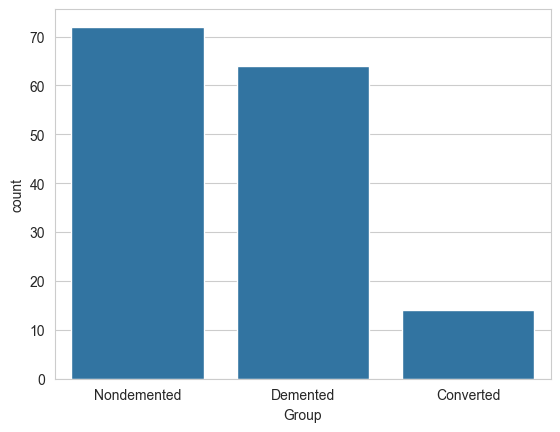

In [233]:
#see how many people have Alzheimer
#same person visits two or more time so only take the single visit data
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

In [234]:
#II) Removing rows with missing values

df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

<Axes: xlabel='Group', ylabel='count'>

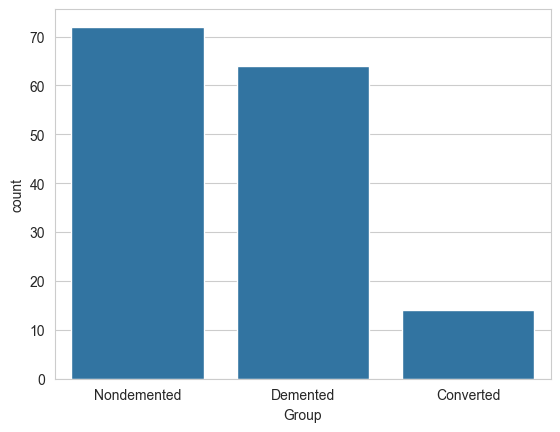

In [235]:
#We have three groups so convert Converted Group Into Demented
#ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace('Converted', 'Demented')
df = df.dropna(subset=["Group"])
df["Group"] = df["Group"].map({"Demented": 1, "Nondemented": 0})
sns.countplot(x='Group', data=ex_df)

In [236]:
 # Encode gender
df["M/F"] = df["M/F"].map({"F": 0, "M": 1})
 
# Drop unnecessary columns
df.drop(columns=["Subject ID", "MRI ID", "Hand"], inplace=True, errors="ignore")
 

M/F           M   F
Demented     36  28
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

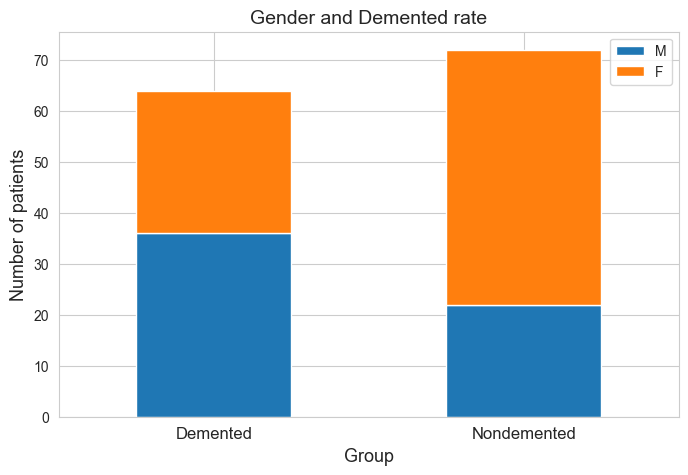

In [237]:
# bar drawing function
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)
                
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

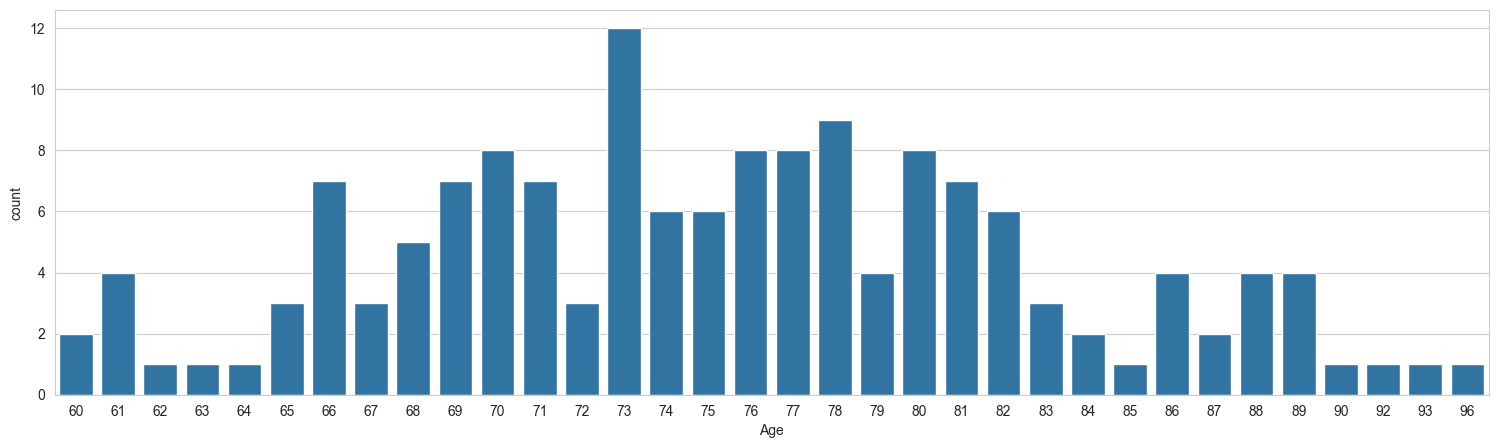

In [238]:
ax = sns.countplot(x='Age', data=ex_df)
ax.figure.set_size_inches(18.5, 5)

c:\Users\Magic\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Magic\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(50.0, 100.0)

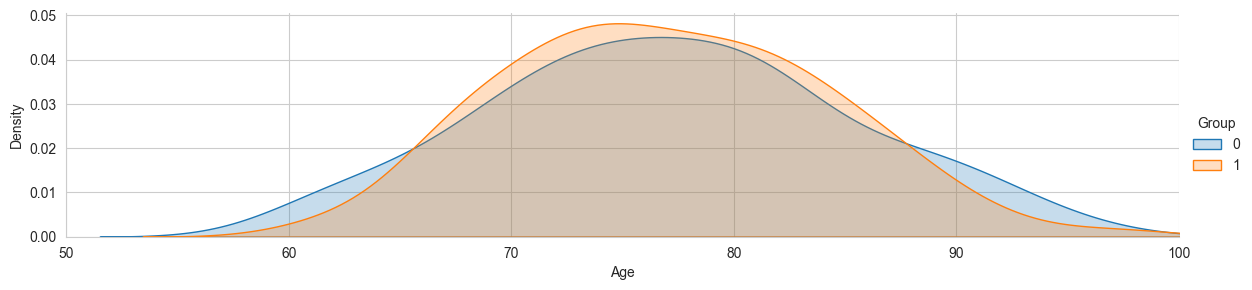

In [239]:
#AGE vs Non-demented and demented
facet= sns.FacetGrid(df,hue="Group", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

> **There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.**

c:\Users\Magic\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\Magic\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(15.3, 30.0)

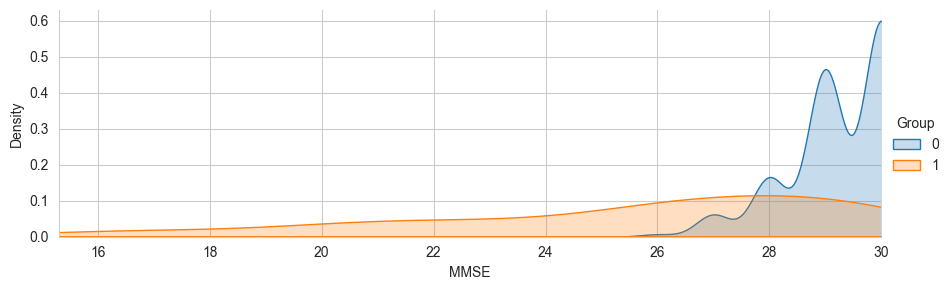

In [240]:
#MMSE Vs Non-demented and demented
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

>**The chart shows Nondemented group got much more higher MMSE scores than Demented group.**

In [241]:
#find the outliers in each of the column
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369], dtype=int64),)
EDUC :  (array([107, 108, 109], dtype=int64),)
SES :  (array([136, 137, 138, 161, 162, 179, 180], dtype=int64),)
MMSE :  (array([  4,  25,  26,  43,  44,  51,  52,  60,  88,  89,  90,  93,  94,
        97,  98,  99, 100, 101, 105, 106, 138, 162, 172, 173, 184, 185,
       186, 222, 225, 226, 231, 232, 234, 251, 299, 300, 316, 317, 328,
       332, 360, 366], dtype=int64),)
eTIV :  (array([0, 1], dtype=int64),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282], dtype=int64),)


In [242]:
 # Split data
X = df[["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]]
y = df["Group"]
print("Class distribution:\n", y.value_counts())
 
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42, stratify=y
)

Class distribution:
 Group
0    190
1    183
Name: count, dtype: int64


In [243]:
print(df['M/F'])

0      1
1      1
2      1
3      1
4      1
      ..
368    1
369    1
370    0
371    0
372    0
Name: M/F, Length: 373, dtype: int64


In [244]:
df

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,1,87,14,2,27,0.0,1987,0.696,0.883
1,0,2,457,1,88,14,2,30,0.0,2004,0.681,0.876
2,1,1,0,1,75,12,2,23,0.5,1678,0.736,1.046
3,1,2,560,1,76,12,2,28,0.5,1738,0.713,1.010
4,1,3,1895,1,80,12,2,22,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,1,82,16,1,28,0.5,1693,0.694,1.037
369,1,3,2297,1,86,16,1,26,0.5,1688,0.675,1.040
370,0,1,0,0,61,13,2,30,0.0,1319,0.801,1.331
371,0,2,763,0,63,13,2,30,0.0,1327,0.796,1.323


In [245]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [246]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

def report_performance(model):
    model_test = model.predict(X_test)
    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test, pred)
    print("\nAccuracy of the Model: ", accu)


In [247]:
# def plot_confusion_metrix(y_test, model_test):
#     cm = metrics.confusion_matrix(y_test, model_test)
#     plt.figure(1)
#     plt.clf()
#     plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
#     classNames = ['Nondemented','Demented']
#     plt.title('Confusion Matrix')
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
#     tick_marks = np.arange(len(classNames))
#     plt.xticks(tick_marks, classNames)
#     plt.yticks(tick_marks, classNames)
#     s = [['TN','FP'], ['FN', 'TP']]
#     for i in range(2):
#         for j in range(2):
#             plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
#     plt.show()


In [248]:
total_models = ['SVC','DecisionTreeClassifier']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAccuracy Of the Model: ",accu,"\n\n")
    print(str((str(model).split('(')[0])))
    total_accuracy[str((str(model).split('(')[1]))] = accu
    

In [249]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier




In [250]:
print("Unique classes in y_train:", np.unique(y_train))


Unique classes in y_train: [0 1]


### SVM



Confusion Matrix:
[[50  7]
 [20 35]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        57
           1       0.83      0.64      0.72        55

    accuracy                           0.76       112
   macro avg       0.77      0.76      0.75       112
weighted avg       0.77      0.76      0.76       112



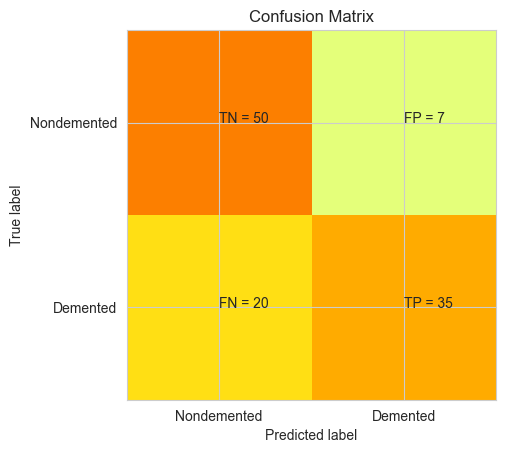

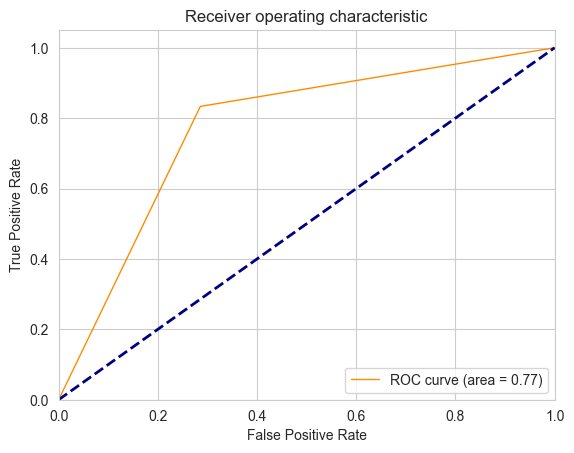


Accuracy Of the Model:  0.7589285714285714 


SVC


In [251]:
svm = SVC(kernel="linear", C=0.1, random_state=0)
svm.fit(X_train, y_train)
report_performance(svm)
roc_curves(svm)
accuracy(svm)

### DecisionTreeClassifier



Confusion Matrix:
[[50  7]
 [22 33]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.88      0.78        57
           1       0.82      0.60      0.69        55

    accuracy                           0.74       112
   macro avg       0.76      0.74      0.73       112
weighted avg       0.76      0.74      0.74       112



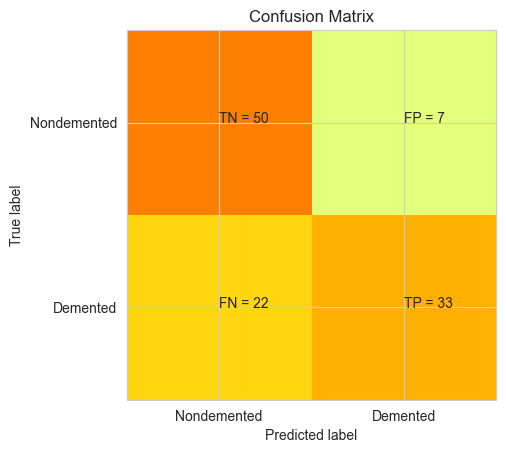

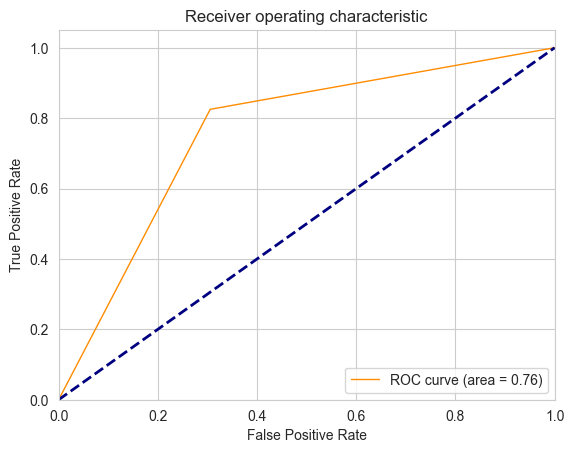


Accuracy Of the Model:  0.7410714285714286 


DecisionTreeClassifier


In [252]:
clf_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf_dtc.fit(X_train, y_train)
report_performance(clf_dtc)
roc_curves(clf_dtc)
accuracy(clf_dtc)

Random Forest Classifier



Confusion Matrix:
[[47 10]
 [15 40]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        57
           1       0.80      0.73      0.76        55

    accuracy                           0.78       112
   macro avg       0.78      0.78      0.78       112
weighted avg       0.78      0.78      0.78       112



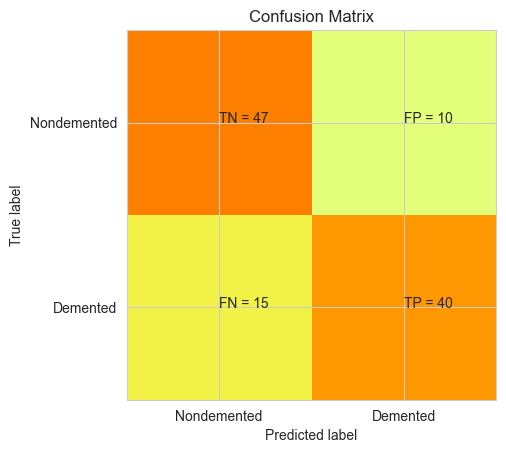

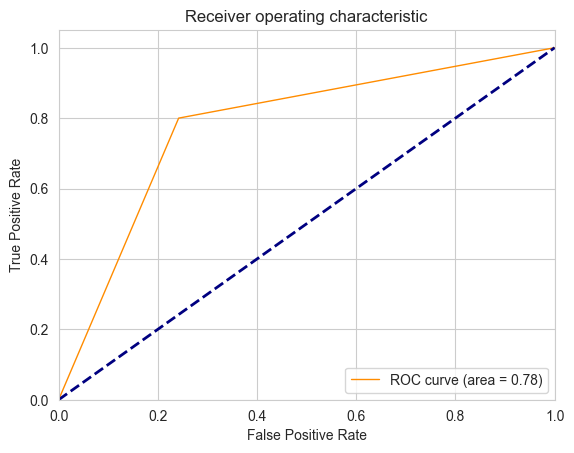


Accuracy Of the Model:  0.7767857142857143 


RandomForestClassifier


In [253]:
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=8, max_features='sqrt', criterion='gini', random_state=42)
clf_rf.fit(X_train, y_train)
report_performance(clf_rf)
roc_curves(clf_rf)
accuracy(clf_rf)
